In [19]:
import pandas as pd
import csv
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics

In [2]:
# This function should transform data into a usable format 
def featureProcess(path):
    data = pd.read_csv(path)
    #get audio data from vect1 to vect148
    textData = data.loc[:, "tags"]
    
    return textData.values.tolist()

In [3]:
# This function should transform data into a usable format 
def labelProcess(path):
    data = pd.read_csv(path)
    #get classes
    labels = data.loc[:,"genre"].values.tolist()
    
    return labels

In [4]:
def train(trainData, trainLabel, model):
    model.fit(trainData, trainLabel)
                 
    print("train finish")

In [5]:
def predict(testData, model):
    prediction = model.predict(testData)
    return prediction

In [6]:
def evaluate(test_label, prediction):
    accuracy = metrics.accuracy_score(test_label, prediction)
    return accuracy

DATA Preprocess

In [7]:
trainData = np.array(featureProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_features.csv"))
validData = np.array(featureProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_features.csv"))
testData = np.array(featureProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv"))

In [10]:
#create BOW
trainTxt = []
validTxt = []
testTxt = []
for i in range(len(trainData)):
    trainTxt.append(trainData[i].replace(",", ""))
    
for i in range(len(validData)):
    validTxt.append(validData[i].replace(",", ""))   
    
for i in range(len(testData)):
    testTxt.append(testData[i].replace(",", ""))   
    
vectorizer = CountVectorizer() 
trainVectors = vectorizer.fit_transform(trainTxt)
validVectors = vectorizer.transform(validTxt)
testVectors = vectorizer.transform(testTxt)

In [11]:
trainLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\train_labels.csv")
validLabel = labelProcess(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\valid_labels.csv")

Training

In [12]:
k = 6
classifier = KNeighborsClassifier(n_neighbors=k)
train(trainVectors, trainLabel, classifier)

train finish


In [13]:
prediction = predict(validVectors, classifier)

['soul and reggae' 'classic pop and rock' 'classic pop and rock'
 'dance and electronica' 'dance and electronica' 'metal' 'metal' 'pop'
 'pop' 'classic pop and rock' 'jazz and blues' 'punk' 'pop' 'pop'
 'classic pop and rock' 'classic pop and rock' 'dance and electronica'
 'pop' 'punk' 'dance and electronica' 'pop' 'classic pop and rock' 'pop'
 'dance and electronica' 'dance and electronica' 'pop'
 'classic pop and rock' 'dance and electronica' 'dance and electronica'
 'pop' 'dance and electronica' 'pop' 'pop' 'dance and electronica' 'pop'
 'dance and electronica' 'dance and electronica' 'dance and electronica'
 'pop' 'dance and electronica' 'dance and electronica'
 'classic pop and rock' 'classic pop and rock' 'metal' 'punk' 'metal'
 'punk' 'pop' 'pop' 'dance and electronica' 'classic pop and rock' 'pop'
 'dance and electronica' 'classic pop and rock' 'dance and electronica'
 'dance and electronica' 'classic pop and rock' 'punk' 'punk' 'pop'
 'classic pop and rock' 'pop' 'dance and el

In [14]:
accuracy = evaluate(validLabel, prediction)
print(accuracy)

0.30444444444444446


Predict

In [ ]:
trackID = pd.read_csv(r"D:\Unimelb\Introduction to Machine Learning\assignment2\dataset\dataset\test_features.csv").loc[:, "trackID"].values.tolist()
prediction = predict(testVectors, classifier)
result = list(zip(trackID,prediction))

In [ ]:
with open("BOW-KNN_outPut.csv", 'w', newline='') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(["trackID", "genre"])
    writer.writerows(result)

K's optimization

In [14]:
accuracies=[]

for k in range(1,101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(trainVectors, trainLabel)
    prediction = classifier.predict(validVectors)
    accuracy = metrics.accuracy_score(validLabel, prediction)
    accuracies.append(accuracy)

The optimal value for K is 6


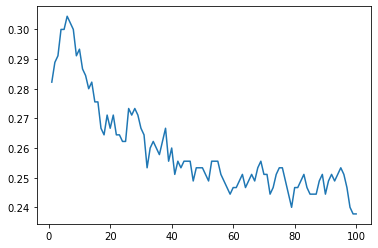

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,101), accuracies)
print("The optimal value for K is {}".format(accuracies.index(max(accuracies)) + 1))

In [ ]:
max(accuracies)